In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
df = pd.read_csv('APARINDS_NSE.csv')

In [208]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2015-01-01  406.000000  414.399994  406.000000  409.899994  371.951965   
1  2015-01-02  411.000000  424.649994  409.000000  415.850006  377.351074   
2  2015-01-05  417.750000  419.000000  400.100006  406.049988  368.458405   
3  2015-01-06  405.049988  405.500000  383.500000  386.649994  350.854401   
4  2015-01-07  388.049988  393.500000  380.000000  385.549988  349.856262   

    Volume  
0  16230.0  
1  31030.0  
2  19090.0  
3  23204.0  
4  19569.0

In [209]:
df = df.dropna()

In [210]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1623  2021-07-30  670.000000  674.700012  646.500000  649.200012  640.294006   
1624  2021-08-02  655.049988  670.150024  655.049988  659.200012  650.156799   
1625  2021-08-03  665.000000  680.950012  658.099976  667.049988  657.899109   
1626  2021-08-04  672.400024  722.900024  667.049988  692.500000  683.000000   
1627  2021-08-05  692.950012  692.950012  661.000000  667.950012  667.950012   

        Volume  
1623  183161.0  
1624   97153.0  
1625  172994.0  
1626  949234.0  
1627  213812.0

In [211]:
df1 = df.iloc[:,1:2].values

In [212]:
df1

array([[406.      ],
       [411.      ],
       [417.75    ],
       ...,
       [665.      ],
       [672.400024],
       [692.950012]])

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [214]:
scaled_df = scaler.fit_transform(df1)

In [215]:
len(scaled_df)

1625

In [216]:
a = len(scaled_df)

In [217]:
input_len = 100
xtrain = []
ytrain = []
for i in range(0, (a-input_len)):
    xtrain.append(scaled_df[i:i+input_len,0])
    ytrain.append(scaled_df[i+input_len,0])


In [218]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
ytrain.shape

(1525,)

In [219]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
ytrain = np.reshape(ytrain, (ytrain.shape[0], 1))
ytrain.shape

(1525, 1)

In [220]:
x_train = xtrain[:-input_len, :,:]
y_train = ytrain[:-input_len, :]
xtest = xtrain[-input_len:,:,:]
ytest = df1[-input_len:,:]

In [221]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
from keras.layers import Dropout

In [222]:
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss ='mse')
model.summary


<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000189F9DF9A20>>

In [224]:
model.fit(x_train,y_train,batch_size=65,epochs=25)

Epoch 1/25
22/22 [==============================] - 6s 247ms/step - loss: 0.0027
Epoch 2/25
22/22 [==============================] - 7s 307ms/step - loss: 0.0028
Epoch 3/25
22/22 [==============================] - 7s 328ms/step - loss: 0.0026
Epoch 4/25
22/22 [==============================] - 7s 311ms/step - loss: 0.0025
Epoch 5/25
22/22 [==============================] - 7s 308ms/step - loss: 0.0027
Epoch 6/25
22/22 [==============================] - 7s 329ms/step - loss: 0.0026
Epoch 7/25
22/22 [==============================] - 8s 343ms/step - loss: 0.0027
Epoch 8/25
22/22 [==============================] - 7s 311ms/step - loss: 0.0028
Epoch 9/25
22/22 [==============================] - 7s 335ms/step - loss: 0.0027
Epoch 10/25
22/22 [==============================] - 7s 316ms/step - loss: 0.0025
Epoch 11/25
22/22 [==============================] - 7s 327ms/step - loss: 0.0025
Epoch 12/25
22/22 [==============================] - 7s 326ms/step - loss: 0.0026
Epoch 13/25
22/22 [======

In [225]:
yval = model.predict(xtest)

In [226]:
yval.shape

(100, 1)

In [227]:
ytest.shape

(100, 1)

In [228]:
yval = scaler.inverse_transform(yval)

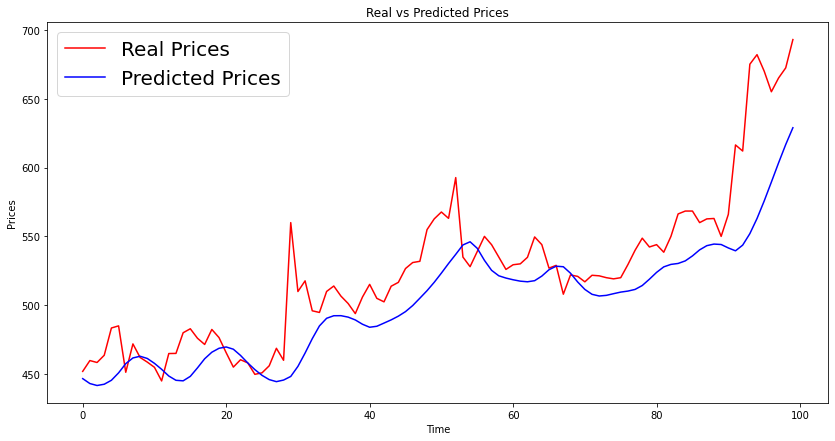

In [229]:
plt.figure(figsize=(14,7))
plt.plot(ytest,'red',label='Real Prices')
plt.plot(yval,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [230]:
from sklearn.metrics import mean_squared_error

In [231]:
np.sqrt(mean_squared_error(ytest, yval))

35.06033799216692

In [237]:
predict_train = model.predict(x_train)
predict_train = scaler.inverse_transform(predict_train)

In [238]:
y_actual_train = scaler.inverse_transform(y_train)

In [239]:
len(y_actual_train)

1425

In [240]:
np.sqrt(mean_squared_error(y_actual_train, predict_train))

30.75286621894712

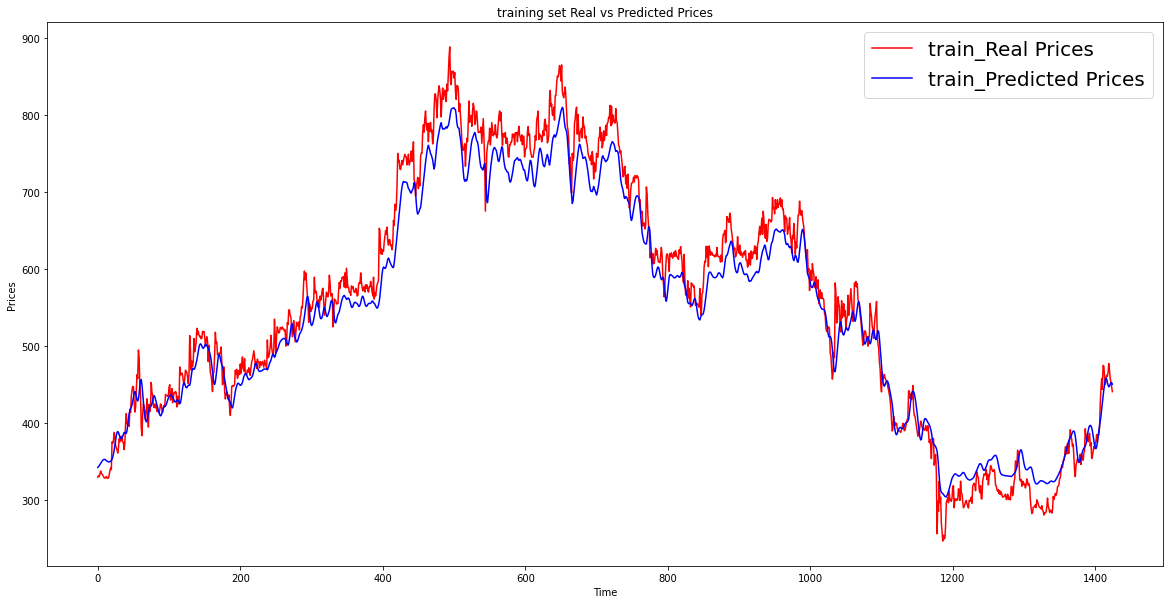

In [242]:
plt.figure(figsize=(20,10))
plt.plot(y_actual_train,'red',label='train_Real Prices')
plt.plot(predict_train,'blue',label='train_Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('training set Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [243]:
model.fit(xtrain,ytrain,batch_size=61,epochs=150)

Epoch 1/150
25/25 [==============================] - 7s 200ms/step - loss: 0.0022
Epoch 2/150
25/25 [==============================] - 5s 202ms/step - loss: 0.0024
Epoch 3/150
25/25 [==============================] - 5s 206ms/step - loss: 0.0022
Epoch 4/150
25/25 [==============================] - 6s 234ms/step - loss: 0.0023
Epoch 5/150
25/25 [==============================] - 6s 237ms/step - loss: 0.0023
Epoch 6/150
25/25 [==============================] - 6s 227ms/step - loss: 0.0024
Epoch 7/150
25/25 [==============================] - 6s 245ms/step - loss: 0.0022
Epoch 8/150
25/25 [==============================] - 7s 268ms/step - loss: 0.0025
Epoch 9/150
25/25 [==============================] - 7s 286ms/step - loss: 0.0025
Epoch 10/150
25/25 [==============================] - 7s 278ms/step - loss: 0.0023
Epoch 11/150
25/25 [==============================] - 6s 256ms/step - loss: 0.0025
Epoch 12/150
25/25 [==============================] - 7s 278ms/step - loss: 0.0023
Epoch 13/150


In [271]:
forcast=[]
len_forcast = 30
current_batch = xtrain[-1,:,:]
current_batch = np.reshape(current_batch, (1,100,1))

In [272]:
current_batch

array([[[0.30235645],
        [0.31952249],
        [0.33177277],
        [0.32958801],
        [0.33778089],
        [0.3686798 ],
        [0.37109863],
        [0.3185081 ],
        [0.35065542],
        [0.335284  ],
        [0.3300562 ],
        [0.32412609],
        [0.30867666],
        [0.33973158],
        [0.33988764],
        [0.36329588],
        [0.36782147],
        [0.35705369],
        [0.35003121],
        [0.36704119],
        [0.35783396],
        [0.34066792],
        [0.32436016],
        [0.33270911],
        [0.32919787],
        [0.31616728],
        [0.31788389],
        [0.3258427 ],
        [0.34566169],
        [0.3320849 ],
        [0.48813983],
        [0.41003435],
        [0.42212861],
        [0.38818666],
        [0.38631399],
        [0.41011236],
        [0.41627655],
        [0.4048065 ],
        [0.39645756],
        [0.38498751],
        [0.40379216],
        [0.41814923],
        [0.40230962],
        [0.39833023],
        [0.41604243],
        [0

In [273]:

for i in range(0,len_forcast):
    current_pred = model.predict(current_batch)[0]
    forcast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [274]:
forcast

[array([0.6249039], dtype=float32),
 array([0.60131216], dtype=float32),
 array([0.5773965], dtype=float32),
 array([0.5544886], dtype=float32),
 array([0.53403246], dtype=float32),
 array([0.516073], dtype=float32),
 array([0.5002468], dtype=float32),
 array([0.48623568], dtype=float32),
 array([0.47355786], dtype=float32),
 array([0.46208453], dtype=float32),
 array([0.4519247], dtype=float32),
 array([0.44301382], dtype=float32),
 array([0.43503788], dtype=float32),
 array([0.42780995], dtype=float32),
 array([0.4211385], dtype=float32),
 array([0.41499382], dtype=float32),
 array([0.4092819], dtype=float32),
 array([0.40402782], dtype=float32),
 array([0.39931658], dtype=float32),
 array([0.39523157], dtype=float32),
 array([0.39184713], dtype=float32),
 array([0.3891065], dtype=float32),
 array([0.38694903], dtype=float32),
 array([0.38528648], dtype=float32),
 array([0.3840104], dtype=float32),
 array([0.38296664], dtype=float32),
 array([0.38206407], dtype=float32),
 array([0.38

In [275]:
true_forcast = scaler.inverse_transform(forcast)

In [276]:
true_forcast

array([[647.63842909],
       [632.52083125],
       [617.19568364],
       [602.5162931 ],
       [589.40800155],
       [577.89956959],
       [567.75816257],
       [558.77982105],
       [550.65587489],
       [543.30376635],
       [536.79335346],
       [531.08325231],
       [525.97227254],
       [521.34061661],
       [517.06554599],
       [513.12803975],
       [509.46784581],
       [506.10102503],
       [503.08206209],
       [500.4643913 ],
       [498.29564141],
       [496.5394511 ],
       [495.15693822],
       [494.09157466],
       [493.27386526],
       [492.60501953],
       [492.02665694],
       [491.50237799],
       [491.01606453],
       [490.5580533 ]])

In [277]:
avail_data = pd.DataFrame(df1)
df_forcast = pd.DataFrame(true_forcast, index= range(1625,1655))

In [278]:
df_forcast.tail()

0
1650  492.605020
1651  492.026657
1652  491.502378
1653  491.016065
1654  490.558053

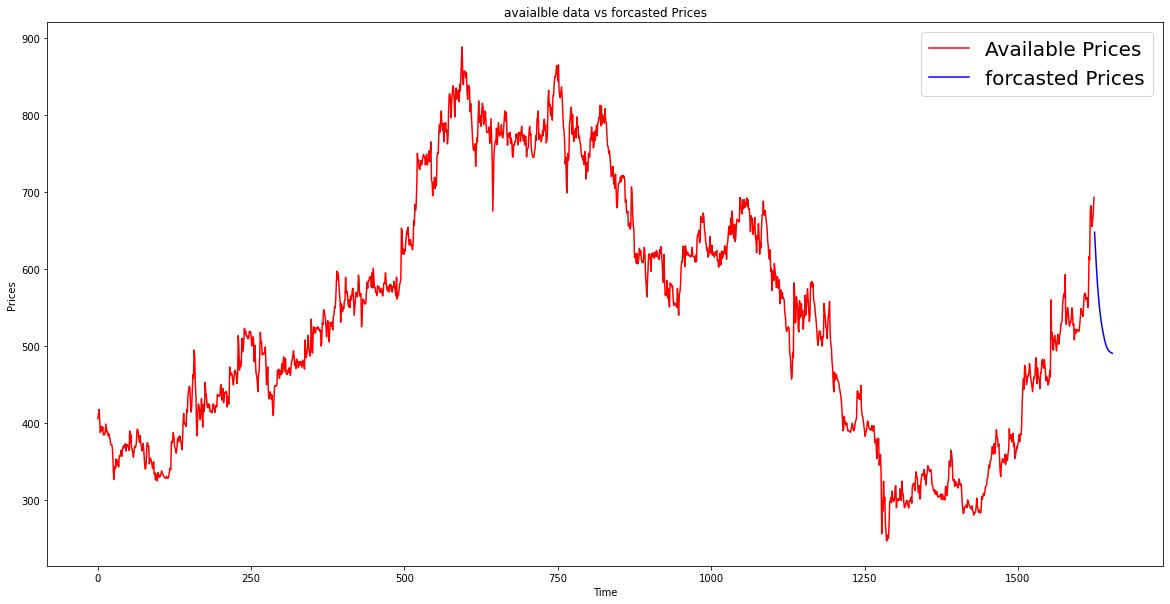

In [279]:
#plot
plt.figure(figsize=(20,10))
plt.plot(avail_data,'red',label='Available Prices')
plt.plot(df_forcast,'blue',label='forcasted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('avaialble data vs forcasted Prices')
plt.legend(loc='best', fontsize=20)

In [280]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1623  2021-07-30  670.000000  674.700012  646.500000  649.200012  640.294006   
1624  2021-08-02  655.049988  670.150024  655.049988  659.200012  650.156799   
1625  2021-08-03  665.000000  680.950012  658.099976  667.049988  657.899109   
1626  2021-08-04  672.400024  722.900024  667.049988  692.500000  683.000000   
1627  2021-08-05  692.950012  692.950012  661.000000  667.950012  667.950012   

        Volume  
1623  183161.0  
1624   97153.0  
1625  172994.0  
1626  949234.0  
1627  213812.0

In [292]:
dates = np.arange('2021-08-06', '2021-09-20', dtype = 'datetime64[D]')

In [293]:
dates = np.delete(dates, [1,2,8,9,15,16,22,23,29,30,36,37,43,44])

In [298]:
dates = np.delete(dates, 30)

In [299]:
dates

array(['2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
       '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17',
       '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
       '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
       '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
       '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08',
       '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14',
       '2021-09-15', '2021-09-16'], dtype='datetime64[D]')

In [301]:
df_forcast['dates'] = dates

In [302]:
df_forcast.set_index('dates')

0
dates                 
2021-08-06  647.638429
2021-08-09  632.520831
2021-08-10  617.195684
2021-08-11  602.516293
2021-08-12  589.408002
2021-08-13  577.899570
2021-08-16  567.758163
2021-08-17  558.779821
2021-08-18  550.655875
2021-08-19  543.303766
2021-08-20  536.793353
2021-08-23  531.083252
2021-08-24  525.972273
2021-08-25  521.340617
2021-08-26  517.065546
2021-08-27  513.128040
2021-08-30  509.467846
2021-08-31  506.101025
2021-09-01  503.082062
2021-09-02  500.464391
2021-09-03  498.295641
2021-09-06  496.539451
2021-09-07  495.156938
2021-09-08  494.091575
2021-09-09  493.273865
2021-09-10  492.605020
2021-09-13  492.026657
2021-09-14  491.502378
2021-09-15  491.016065
2021-09-16  490.558053